In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
sns.set_palette('deep')

In [47]:
DATA_PATH = Path("../data/raw/Neo_Earth_Object.csv")
df = pd.read_csv(DATA_PATH)

In [48]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [49]:
print(f"Dataset Shape: ", df.shape)
display(df.dtypes.to_frame(name="Data Type").T)

Dataset Shape:  (1573, 9)


,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
Data Type,object,object,float64,float64,float64,float64,float64,object,int64


In [50]:
display(df.head())

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
0,(2023 JA1),2023-May-03 01:15 ± < 00:01,0.02518,0.02509,5.01,4.99,26.6,13 m - 29 m,0
1,(2023 HV5),2023-May-03 03:16 ± < 00:01,0.00291,0.00290,8.93,8.82,27.2,9.8 m - 22 m,0
2,(2023 JM2),2023-May-03 05:23 ± < 00:01,0.04008,0.03996,6.33,6.32,26.0,17 m - 38 m,0
3,(2023 HF7),2023-May-04 00:02 ± < 00:01,0.00427,0.00426,13.10,13.05,26.8,12 m - 26 m,0
4,(2023 HH7),2023-May-04 05:47 ± < 00:01,0.00561,0.00558,24.55,24.53,25.5,21 m - 47 m,1


In [51]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

In [52]:
if not missing.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.values, y=missing.index, color="tomato")
    plt.title("Missing Values per Column")
    plt.xlabel("Count")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

In [53]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


In [54]:
display(df.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Object,1573,1573,(2023 JA1),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Close-Approach (CA) Date,1573,1570,2023-Sep-30 09:02 ± < 00:01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA DistanceNominal (au),1573.0,NaN,NaN,NaN,0.021108,0.014094,0.00007,0.00853,0.01984,0.03229,0.04996
CA DistanceMinimum (au),1573.0,NaN,NaN,NaN,0.020705,0.013952,0.00007,0.00831,0.01919,0.03163,0.0497
V relative(km/s),1573.0,NaN,NaN,NaN,10.596853,5.098807,0.44,7.04,9.6,13.36,36.37
V infinity(km/s),1573.0,NaN,NaN,NaN,10.540846,5.115487,0.13,7.0,9.57,13.32,36.37
H(mag),1573.0,NaN,NaN,NaN,26.136554,1.790651,18.5,25.2,26.2,27.2,32.3
Diameter,1573,284,11 m - 24 m,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rarity,1573.0,NaN,NaN,NaN,0.127146,0.381315,0.0,0.0,0.0,0.0,3.0


In [55]:
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()


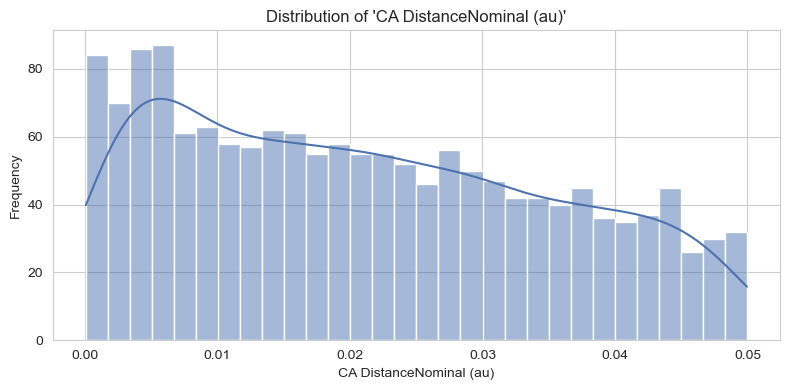

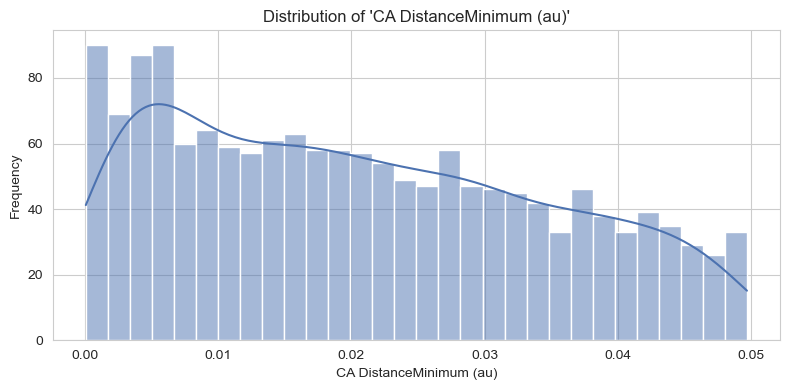

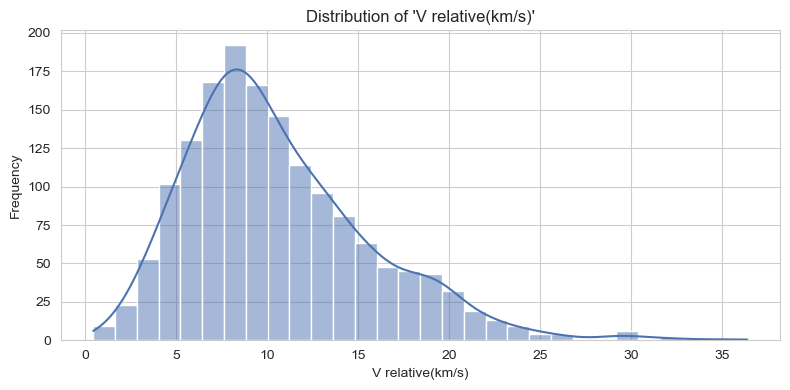

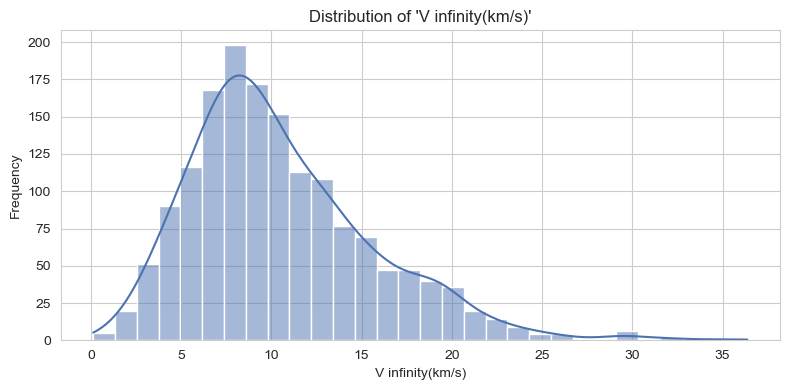

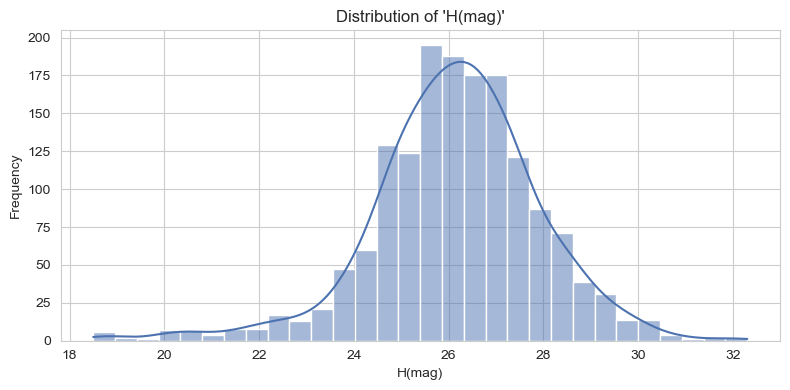

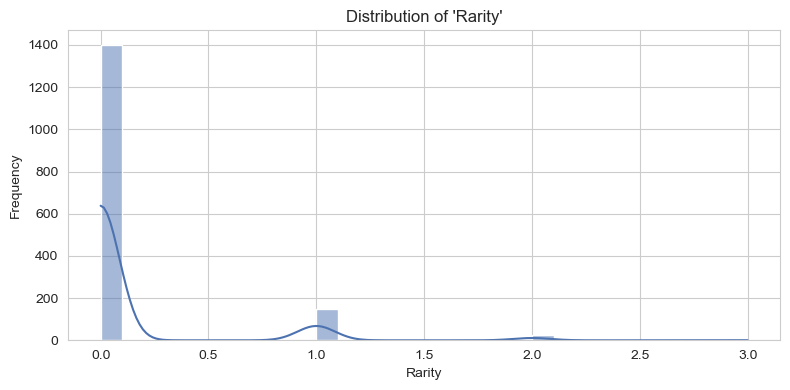

In [56]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

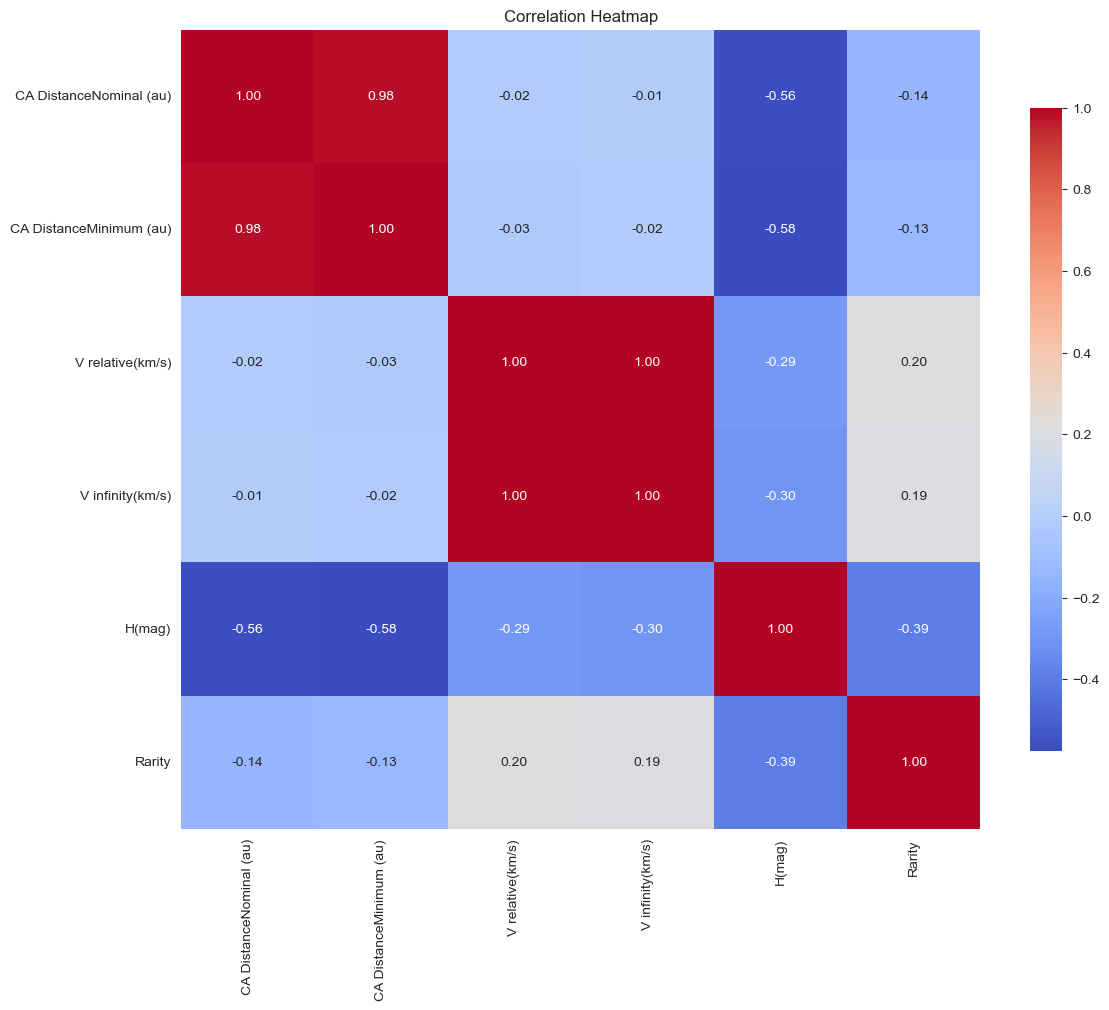

In [57]:
plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [58]:
numerical_cols = [
    "CA DistanceNominal (au)", "CA DistanceMinimum (au)",
    "V relative(km/s)", "V infinity(km/s)", "H(mag)", "Diameter"
]

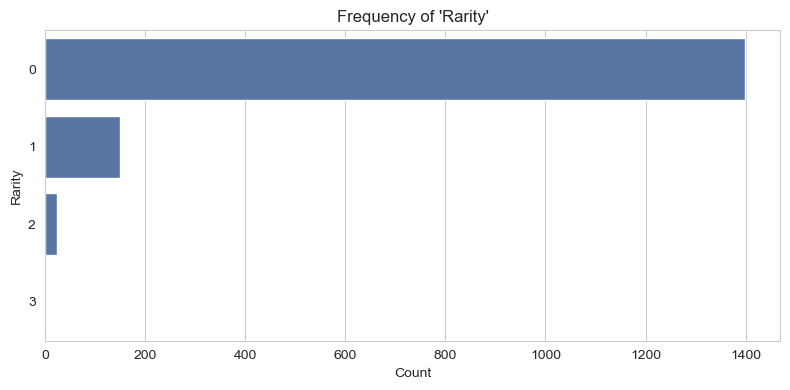

In [59]:
for col in categorical_cols:
    if df[col].nunique() <= 20:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f"Frequency of '{col}'")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

In [60]:
pairplot_cols = [
    "CA DistanceNominal (au)",
    "CA DistanceMinimum (au)",
    "V relative(km/s)",
    "V infinity(km/s)",
    "H(mag)",
    "Diameter"
]

In [61]:
df_pairplot = df[pairplot_cols].dropna()

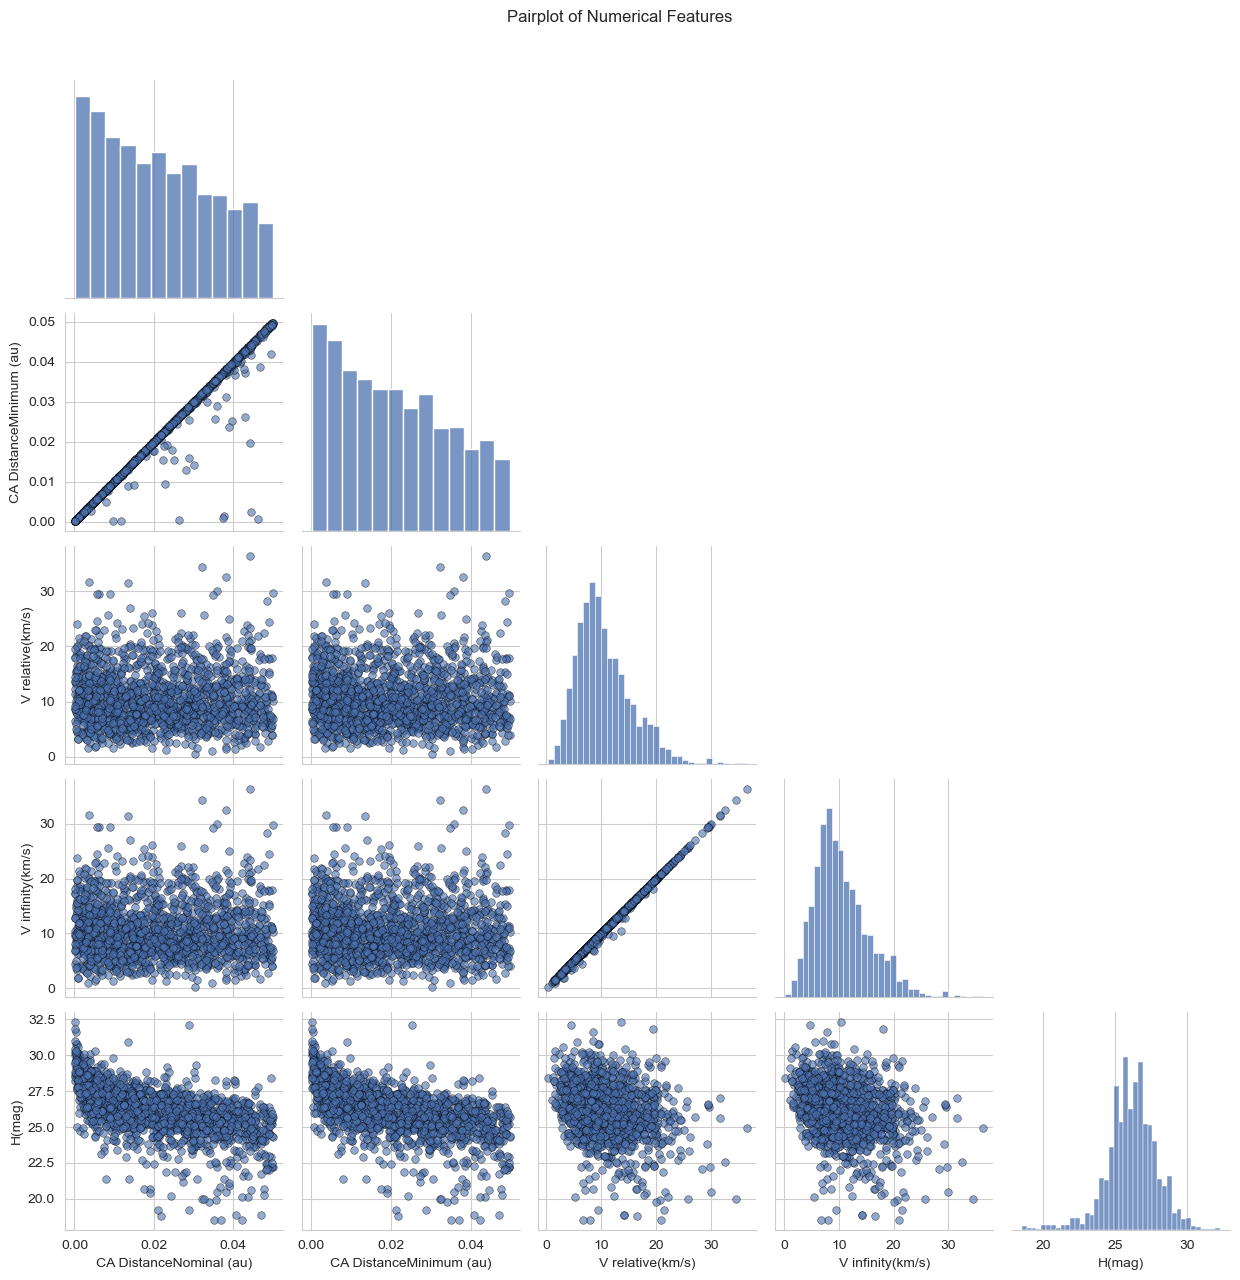

In [62]:
sns.pairplot(df_pairplot, corner=True, plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'})
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()